# Predictive Modeling: Using Patient Data for Heart Disease

Problem Statement 

A hospital was looking desperately for an expert data scientist to find a solution for of one of the
problems that if solved will save the hospital a large amount of money and will save lives
of many people who have heart disease and require urgent care. The data scientist is required to
build a classification model that can predict whether or not a person suffers from a heart
disease based on primary physical features, of that person, collected when admitted to the
hospital. 

In [24]:
import numpy as np 
import pandas as pd 
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('heart_dis.csv')
data.head(10)

,age,gender,cp,rbp,chol,fbs,rstg,mhr,exang,oldpeak,slope,target
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,1
8,52,1,2,172,199,1,1,162,0,0.5,2,1
9,57,1,2,150,168,0,1,174,0,1.6,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   gender   303 non-null    int64  
 2   cp       303 non-null    int64  
 3   rbp      303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   rstg     303 non-null    int64  
 7   mhr      303 non-null    int64  
 8   exang    303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    int64  
 11  target   303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


First, I want to look into the data first by looking at the first 10 rows and understanding the data more by using the info() function. 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'rbp'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'rstg'}>,
        <AxesSubplot:title={'center':'mhr'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

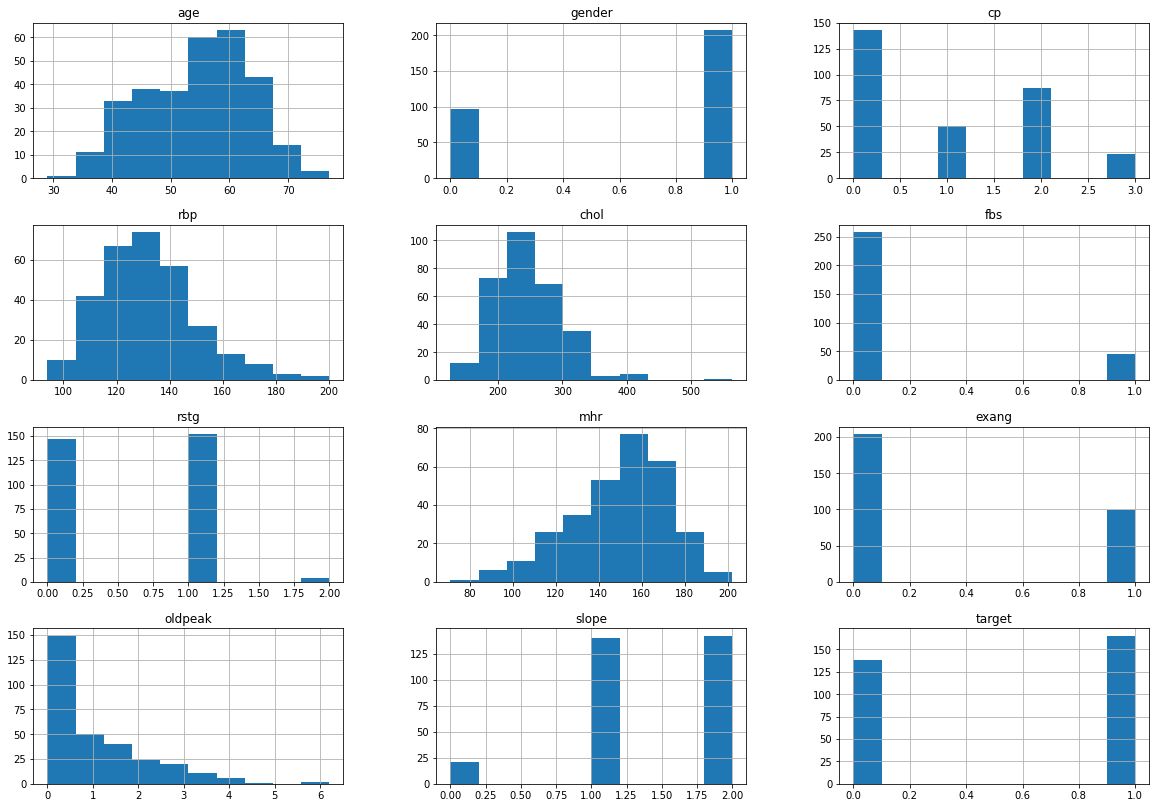

In [26]:
data.hist()

After performing hist() function we able to gain more insight into the patient data. I notice that while performing this function help show the different weights of all the different attributes. When looking mhr(max heart rate achieved )  the data shows a very good bell curve. I will investigate the age catergory more to see if there may be direct correlation to Age and MHR

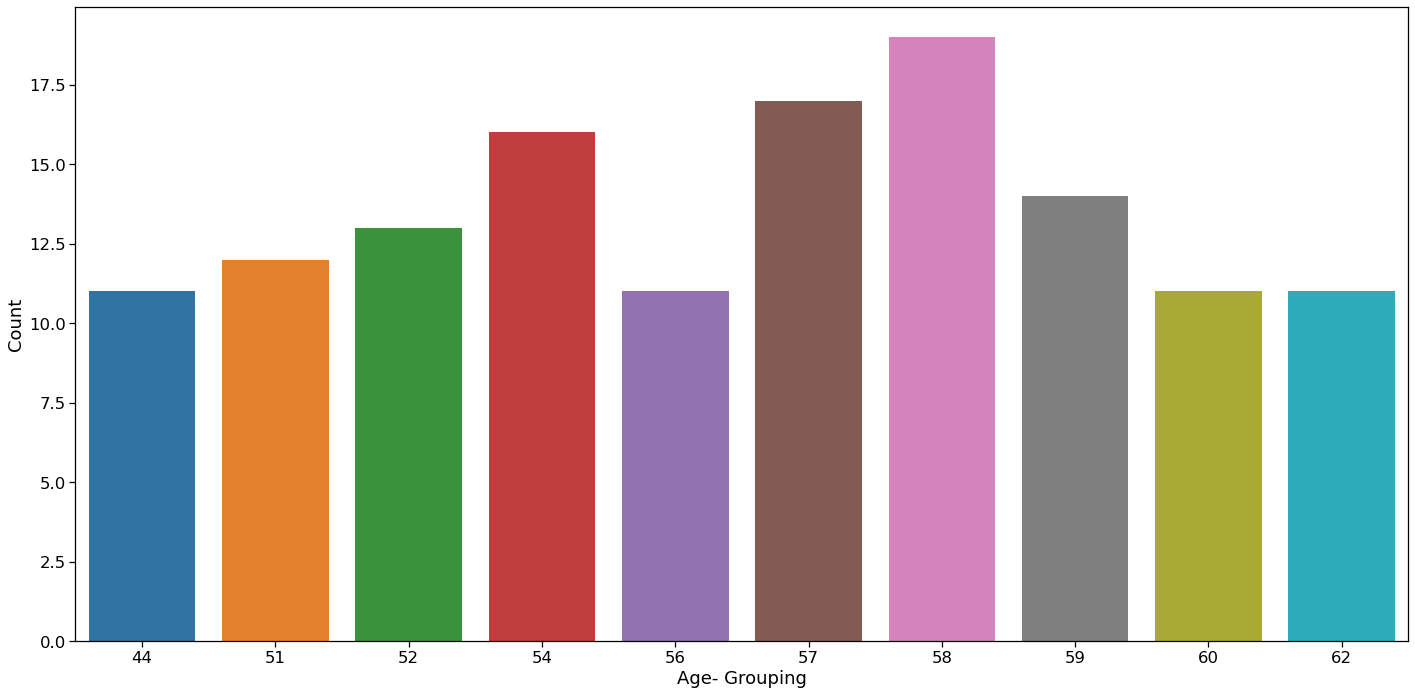

In [48]:
plt.figure(figsize=(20,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values)
plt.xlabel("Age- Grouping")
plt.ylabel("Count")
plt.tight_layout()

This code creates a bar plot to visualize the distribution of the top 10 most common ages in the dataset. The `plt.figure(figsize=(20,10))` line initializes the plot with a specified figure size, ensuring the chart is large enough for clear visualization. The `sns.set_context('notebook', font_scale=1.5)` sets the Seaborn plotting context to 'notebook' and scales up the font size for better readability. Using `sns.barplot`, the x-axis represents the top 10 most frequent age groups (extracted from the dataset using `data.age.value_counts()[:10].index`), while the y-axis shows the corresponding counts of each age group (`data.age.value_counts()[:10].values`). Labels for the axes are defined as "Age-Grouping" and "Count" using `plt.xlabel()` and `plt.ylabel()`, respectively. Finally, `plt.tight_layout()` adjusts the layout to ensure that all elements fit neatly within the figure area, avoiding overlaps or cut-offs.

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


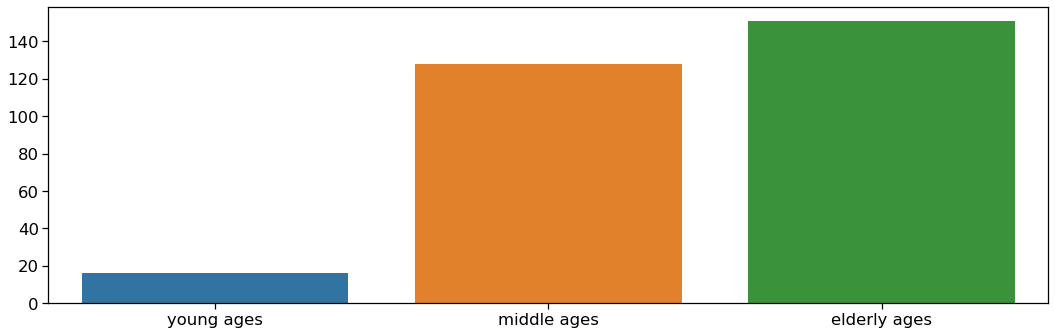

In [40]:
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Young = data[(data.age>=29)&(data.age<40)]
Middle_Age = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

plt.figure(figsize=(15,5))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle_Age),len(Elder)])
plt.tight_layout()

This code analyzes the age distribution within a dataset and visualizes the count of individuals across different age groups. Initially, it calculates the minimum, maximum, and mean age using the `min()`, `max()`, and `mean()` functions, respectively, applied to the `age` column of the dataset. These summary statistics are then printed to provide an overview of the age range and average age in the dataset.

Next, the dataset is divided into three distinct age groups based on age ranges:  
- **Young**: Individuals aged between 29 and 39 (inclusive of 29 but excluding 40).  
- **Middle_Age**: Individuals aged between 40 and 54 (inclusive of 40 but excluding 55).  
- **Elder**: Individuals aged above 55.

Using these groups, the length of each group (the number of individuals) is calculated, and a bar plot is generated to visualize the distribution. The plot uses categories ('young ages', 'middle ages', 'elderly ages') on the x-axis and their respective counts on the y-axis. The figure size is set to ensure clarity, and the `sns.set_context()` function adjusts the font scale for better readability. Finally, `plt.tight_layout()` optimizes the plot layout to prevent overlapping elements. This visualization provides an intuitive understanding of how the dataset's population is distributed among the defined age groups.

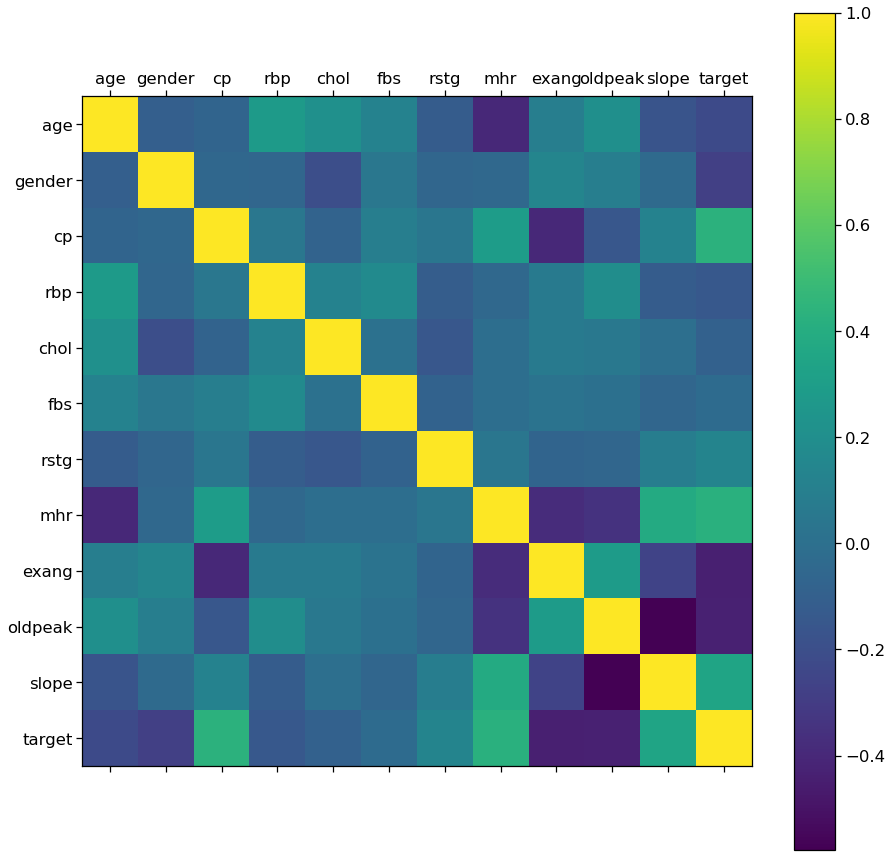

In [44]:
rcParams['figure.figsize'] = 10, 15
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

This code snippet configures and visualizes the correlation matrix of a dataset using Matplotlib. The `rcParams['figure.figsize']` line sets the size of the figure to 10 inches wide and 15 inches tall, ensuring the plot is clearly visible and well-proportioned. The `plt.matshow(data.corr())` function generates a matrix plot of the correlation coefficients between the columns of the dataset `data`. The `plt.yticks()` and `plt.xticks()` lines label the rows and columns of the matrix with the names of the dataset's columns, ensuring the axes are meaningful and interpretable. The `np.arange(data.shape[1])` dynamically generates the tick positions based on the number of columns in the dataset, ensuring compatibility with datasets of varying sizes. Finally, `plt.colorbar()` adds a color bar to the plot, which serves as a reference for interpreting the correlation values, with colors corresponding to the strength and direction of the correlations. This visualization provides an intuitive way to analyze relationships between variables in the dataset.I noticed that mpr and cp have a strong correlation. 

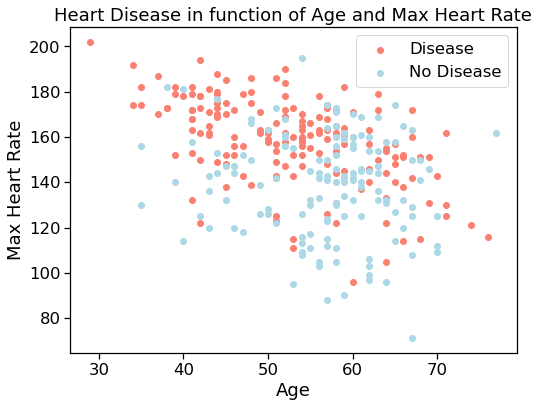

In [50]:
# Create figure to show age and max heart rate
plt.figure(figsize=(8, 6))

# Scatter with postivie examples
plt.scatter(data.age[data.target==1],
            data.mhr[data.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(data.age[data.target==0],
            data.mhr[data.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

This code creates a scatter plot to visually analyze the relationship between age and maximum heart rate (mhr) in individuals, with the data grouped based on the presence or absence of heart disease. A figure is initialized with a specified size of 8x6 inches to ensure clear visualization. Two scatter plots are then created: one for individuals diagnosed with heart disease (`target == 1`) using salmon-colored points, and another for individuals without heart disease (`target == 0`) using light blue-colored points. 

To enhance interpretability, a title, x-axis label ("Age"), and y-axis label ("Max Heart Rate") are added to the plot. Additionally, a legend is included to distinguish between the two categories ("Disease" and "No Disease"). This visualization provides a quick and intuitive way to explore trends or patterns in how age and maximum heart rate correlate with heart disease outcomes.

In [8]:
# Splitting Data to make 
X = data.drop('target',axis = 1)
y = data.target

This code snippet splits the dataset into two separate variables: `X` and `y`, which are typically used in machine learning tasks. The `X` variable contains all the input features (independent variables) by dropping the 'target' column from the `data` dataframe, which represents the actual data used to train the model. The `y` variable is assigned the 'target' column from the `data` dataframe, which represents the output or dependent variable, typically the label (in this case, whether or not an individual has heart disease). This separation of features and target is a crucial step for preparing the data for model training, where `X` will be used to predict the outcomes stored in `y`.

In [9]:
# Train the X and y data
x_train, x_test, y_train, y_test = train_test_split(data.drop('target', axis = 1),data['target'],  test_size=0.3, random_state=42)

This code splits the dataset into training and testing sets for model training and evaluation. The `train_test_split` function from the `sklearn.model_selection` module is used to divide the data. The `data.drop('target', axis=1)` removes the target variable (heart disease diagnosis) from the feature set, which is stored in `x_train` and `x_test`. The target variable itself, `data['target']`, is assigned to `y_train` and `y_test` as the labels for the corresponding training and testing sets. The split is done with 70% of the data used for training (`x_train`, `y_train`) and 30% reserved for testing (`x_test`, `y_test`). The `random_state=42` ensures that the split is reproducible, meaning that running the code multiple times will produce the same split, which is useful for consistent results during model evaluation.

In [52]:
# Logistic Regression 
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

This code implements a logistic regression model using the `LogisticRegression` class from a machine learning library (likely scikit-learn). The model is initialized with the `solver='liblinear'` parameter, which specifies the optimization algorithm used for finding the best-fitting model (in this case, the 'liblinear' solver is suitable for smaller datasets). The model is then trained by calling the `fit()` method, which uses the training data (`x_train` for the features and `y_train` for the target labels). After fitting the model to the training data, it makes predictions on the test data (`x_test`) by calling the `predict()` method, storing the resulting predicted labels in the variable `predictions`. This approach is commonly used in binary classification tasks, such as predicting the likelihood of a person being diagnosed with a condition (e.g., heart disease) based on input features.

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.88      0.86      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



# 2 

This code imports the `classification_report` function from the `sklearn.metrics` module and then uses it to generate a detailed performance report of a classification model. The function compares the true labels (`y_test`) with the predicted labels (`predictions`) for a test dataset. The `classification_report` outputs several key evaluation metrics, including precision, recall, F1-score, and support, for each class in the classification task. These metrics provide a comprehensive view of the model's accuracy, sensitivity, and overall performance in classifying data into distinct categories. By printing this report, the user can assess how well the model has generalized to unseen data. Now that have built my first model and performed the Logistic regression model and now I can  use the model to predict whether the new patients, whose physical features stored in the file “new_patients.csv”, have heart disease or not.

In [67]:
data_1 = pd.read_csv('new_patients.csv')

In [73]:
data_1.head()

,age,gender,cp,rbp,chol,fbs,rstg,mhr,exang,oldpeak,slope,target_predictions
0,56,1,1,120,240,0,1,169,0,0.0,0,1
1,55,0,1,132,342,0,1,166,0,1.2,2,1
2,41,1,1,120,157,0,1,182,0,0.0,2,1
3,38,1,2,138,175,0,1,173,0,0.0,2,1
4,38,1,2,138,175,0,1,173,0,0.0,2,1


In [69]:
predictions = logmodel.predict(data_1)
for i in range(len(data_1)):
    print("Predicted=%s" %  (predictions[i]))

Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=1
Predicted=0
Predicted=0
Predicted=0
Predicted=0
Predicted=0


This code snippet uses a trained logistic regression model, `logmodel`, to make predictions on a dataset `data_1`. The `predict()` method is called on `data_1`, generating an array of predicted outcomes for each data point. These predictions, typically binary values (e.g., 0 or 1 for a classification problem), are stored in the `predictions` variable. The `for` loop then iterates over each element in the `predictions` array, printing the predicted outcome for each corresponding entry in `data_1`. The `print` statement outputs each prediction as a formatted string, displaying the predicted value in the format "Predicted=[prediction]". This allows the user to view the model's predictions for each individual data point in the dataset. After performing the logistic regression to predicted the values for the target_prediction we were able to obtain the values from the prediction model. 

In [70]:
data_1['target_predictions'] = predictions
print(data_1)

   age  gender  cp  rbp  chol  fbs  rstg  mhr  exang  oldpeak  slope  \
0   56       1   1  120   240    0     1  169      0      0.0      0   
1   55       0   1  132   342    0     1  166      0      1.2      2   
2   41       1   1  120   157    0     1  182      0      0.0      2   
3   38       1   2  138   175    0     1  173      0      0.0      2   
4   38       1   2  138   175    0     1  173      0      0.0      2   
5   67       1   0  160   286    0     0  108      1      1.5      1   
6   67       1   0  120   229    0     0  129      1      2.6      1   
7   62       0   0  140   268    0     0  160      0      3.6      0   
8   63       1   0  130   254    0     0  147      0      1.4      1   
9   53       1   0  140   203    1     0  155      1      3.1      0   

   target_predictions  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
5                   0  
6                   0  
7              

This code assigns the predicted values stored in the variable `predictions` to a new column named `target_predictions` in the `data_1` DataFrame. The `data_1` DataFrame is updated with these predicted values, which likely represent the model's forecasted outcomes (such as the likelihood of having heart disease) for each record in the dataset. After the column is added, the `print(data_1)` statement outputs the updated DataFrame to the console, allowing the user to view the modified data, including both the original data and the new predictions in the `target_predictions` column.

In [72]:
# Splitting Data to make 
X = data_1.drop('target_predictions',axis = 1)
y = data_1.target_predictions

This code is used to split the dataset into input features and the target variable for model training. The variable `X` is created by dropping the column `'target_predictions'` from the `data_1` DataFrame, which leaves all the columns except the target variable. These remaining columns represent the input features (independent variables) used for predicting the target variable. The variable `y` is assigned the values from the `'target_predictions'` column of `data_1`, which serves as the target variable (dependent variable) that the model will predict. This splitting is a crucial step in preparing the data for machine learning, where `X` contains the features and `y` contains the outcomes the model aims to predict.

In [79]:
# Train the X and y data
X_train, X_test, y_train, y_test = train_test_split(data_1.drop('target_predictions', axis = 1),data_1['target_predictions'],  test_size=0.3, random_state=42)

This code splits the dataset `data_1` into training and testing sets for building and evaluating a machine learning model. The feature set `X` is created by dropping the column `target_predictions` from the dataset, as this column represents the target variable (i.e., the outcome to be predicted). The target variable `y` is assigned to the `target_predictions` column. The `train_test_split` function is then used to randomly divide the data into training and testing subsets, with 70% of the data allocated to training and 30% to testing (specified by `test_size=0.3`). The `random_state=42` ensures that the data is split in the same way every time the code is run, ensuring reproducibility. This division allows for training the model on one set of data and evaluating its performance on a separate set to assess how well the model generalizes to unseen data.

In [89]:
# Logistic Regression 
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



This code performs logistic regression for binary classification. First, it imports the `warnings` module and suppresses any `DeprecationWarning` messages to prevent them from cluttering the output. Then, a logistic regression model (`logmodel`) is instantiated using the 'liblinear' solver, which is well-suited for small datasets or binary classification tasks. The model is trained using the training data (`X_train`, `y_train`) by calling the `fit()` method. After training, the model predicts the target values for the test data (`X_test`) using the `predict()` method, and the predictions are stored in the `predictions` variable. Finally, the `classification_report` function is used to evaluate the performance of the model by comparing the predicted values (`predictions`) with the actual values (`y_test`). The `classification_report` provides metrics such as precision, recall, F1 score, and support, which offer a comprehensive view of the model's classification performance.After performing the Logistic regression, I notice that the accuracy levels were pretty low. My assumption is because the dataset("new_patients") only has 10 rows of data, which could cause the accuracy to be lower. 

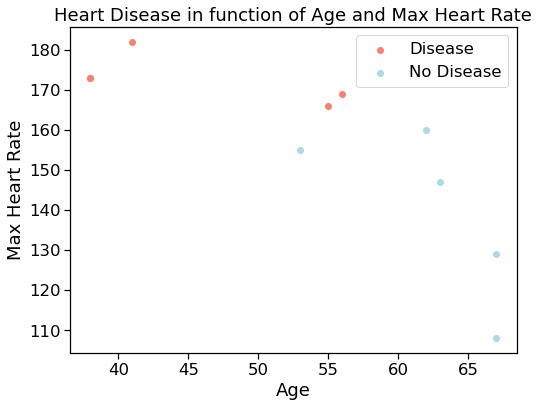

In [85]:
# Create figure to show age and max heart rate
plt.figure(figsize=(8, 6))

# Scatter with postivie examples
plt.scatter(data_1.age[data_1.target_predictions==1],
            data_1.mhr[data_1.target_predictions==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(data_1.age[data_1.target_predictions==0],
            data_1.mhr[data_1.target_predictions==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

This code generates a scatter plot to visualize the relationship between age and maximum heart rate (`mhr`) with respect to the presence or absence of heart disease. A figure is created with a size of 8x6 inches to provide a clear view of the data. Two scatter plots are then generated: one representing individuals with heart disease (`target_predictions == 1`), which are marked with salmon-colored points, and another representing individuals without heart disease (`target_predictions == 0`), marked with light blue points. The plot includes a title ("Heart Disease in function of Age and Max Heart Rate") to describe the visualization, along with labels for the x-axis ("Age") and y-axis ("Max Heart Rate") to indicate what each axis represents. Finally, a legend is added to distinguish between the two groups—those with disease and those without it—providing a clearer interpretation of the plot. This scatter plot helps in visually identifying patterns and differences between the two groups based on age and heart rate. Plotting the data we see that for ages: 40-65 and MHR being between 165-180+ these patient suffered from heart disease compared to other patient who may have been older but the MHR level were below 160 which could played a part in them not being diagnosed with heart disease. 

I can conclude that after making the prediction from the first dataset, we see that accuracy prediction levels were above 80% (86% to be exact ) this helps proved that we should be able to use this prediction to make future decisions about patients. 